# Detection of Lung Cancer

* Lung cancer is a type of cancer that begins in the lungs, which are part of the respiratory system.
* It is one of the most common and serious types of cancer worldwide.
* Lung cancer is often categorized into two main types based on its cellular structure:
    * Non-Small Cell Lung Cancer
    * Small Cell Lung Cancer

* Building a lung cancer detection model involves using machine learning techniques to analyze clinical, imaging, or molecular data for diagnosing lung cancer.
  
* A lung cancer prediction model predicts the likelihood or presence of lung cancer based on input features such as patient demographics, behavioral habits, symptoms, and medical history. The goal is to identify individuals at risk of lung cancer for early diagnosis and intervention.

* The dataset appears to contain a mix of demographic, behavioral, medical, and symptomatic variables that may influence the risk or diagnosis of lung cancer. 

> Details of each attribute in the datasets:
* GENDER : Gender of the individual (e.g., Male/Female).
* AGE :	Age of the individual.
* SMOKING :	Indicator of smoking habit (e.g., Yes/No).
* YELLOW_FINGERS : Presence of yellow fingers, possibly due to nicotine stains (Yes/No).	
* ANXIETY : Anxiety status (Yes/No).
* PEER_PRESSURE : Influence of peer pressure related to smoking or other habits (Yes/No).
* CHRONIC_DISEASE : Presence of chronic diseases other than lung cancer (Yes/No).
* FATIGUE : Presence of fatigue as a symptom (Yes/No).
* ALLERGY : History of allergies (Yes/No).
* WHEEZING : Wheezing as a symptom (Yes/No).
* ALCOHOL_CONSUMING	: Indicator of alcohol consumption (Yes/No).
* COUGHING : Presence of coughing as a symptom (Yes/No).
* SHORTNESS_OF_BREATH : Experience of breathlessness (Yes/No).
* SWALLOWING_DIFFICULTY : Difficulty in swallowing (Yes/No).
* CHEST_PAIN : Experience of chest pain (Yes/No).
* LUNG_CANCER : Target variable indicating lung cancer diagnosis (Yes/No).

> Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

from scipy.stats import chi2_contingency

import joblib as jb
import pickle as pk1

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("lung cancer dataset.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [3]:
# Checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

* Dataset contains 16 columns with no null values.
* There are 2 categorical columns and remaining columns are numerical. 

# Checking and removing null values and duplicates

In [4]:
# Checking if there is any null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
# checking duplicate values
df.duplicated().sum()

np.int64(2)

* There are 2 duplicate values present in dataset so drop them

In [6]:
df[df.duplicated()==True]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1476,M,53,1,2,2,2,2,1,1,1,1,2,2,1,2,NO
2039,M,50,1,1,1,2,1,2,1,2,2,2,2,1,2,YES


In [7]:
# dropping duplicate values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

* Duplicate values are dropped and there is no duplicate values are present in dataset.

In [9]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO


# Analysis of Gender with Lung Cancer

In [10]:
df["GENDER"].value_counts()

GENDER
M    1512
F    1486
Name: count, dtype: int64

<Figure size 800x300 with 0 Axes>

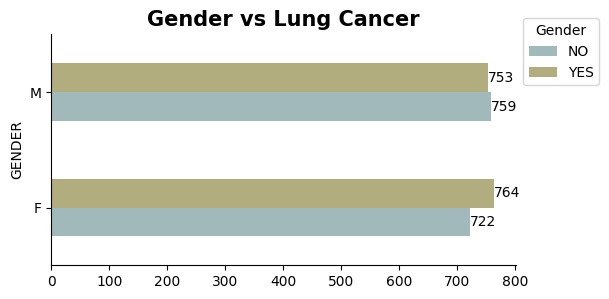

In [11]:
plt.figure(figsize=(8,3))
ax =pd.crosstab(df["GENDER"], df["LUNG_CANCER"]).plot.barh(figsize=(6,3),color=["#a2b9bc","#b2ad7f"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.1), loc="upper left", title="Gender")
plt.title("Gender vs Lung Cancer",fontsize=15,fontweight='bold')
sns.despine(top=True, right=True, left=False)
plt.show()

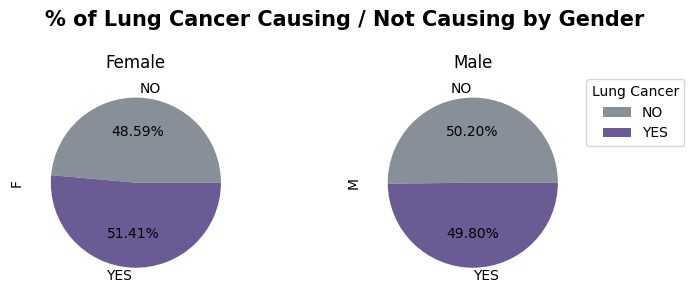

In [12]:
pd.crosstab(df["LUNG_CANCER"], df["GENDER"]).plot.pie(figsize=(8,3), subplots=True, autopct="%.2f%%", legend=False,
                                                     colors=["#878f99","#6b5b95"], title=("Female", "Male"))
plt.suptitle("% of Lung Cancer Causing / Not Causing by Gender", fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.tight_layout()
plt.show()

In [13]:
ct = pd.crosstab(df["LUNG_CANCER"], df["GENDER"]).T.reset_index()
ct

LUNG_CANCER,GENDER,NO,YES
0,F,722,764
1,M,759,753


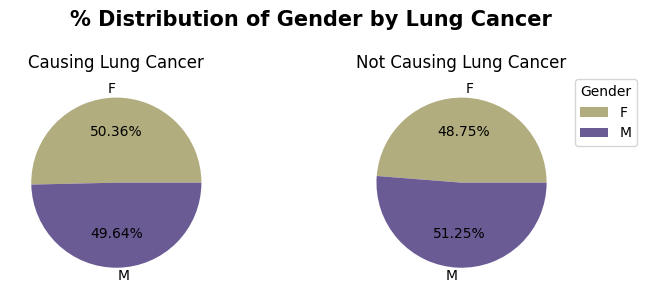

In [14]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.pie(ct["YES"], autopct="%.2f%%", labels=ct["GENDER"], colors=["#b2ad7f","#6b5b95"])
plt.title("Causing Lung Cancer")
plt.subplot(1,2,2)
plt.pie(ct["NO"], autopct="%.2f%%", labels=ct["GENDER"], colors=["#b2ad7f","#6b5b95"])
plt.title("Not Causing Lung Cancer")
plt.suptitle("% Distribution of Gender by Lung Cancer", fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Gender")
plt.tight_layout()
plt.show()

* Out of 1486 Female 764 which is 51.41 % of total female causes lung cancer.
* There is no such difference between causes lung cancer and didnot causes lung cancer in female patients.
* Like female patients, in Male patients there is same ratio between causes and did not causes lung cancer patients.
* Out of 1512 Male 753 which is 49.80 % of totel Male causes lung cancer.
* There is a same ratio between Male and Female patients who has lung cancer where Female (50.36 %) is slightly more than Male (49.64 %).
* Male patients (51.25 %) is slightly more than Female patients (48.75 %) who did not has lung cancer.

# Analysis of Age with Lung Cancer

In [15]:
df["AGE"].describe()

count    2998.000000
mean       55.171448
std        14.728302
min        30.000000
25%        42.000000
50%        55.000000
75%        68.000000
max        80.000000
Name: AGE, dtype: float64

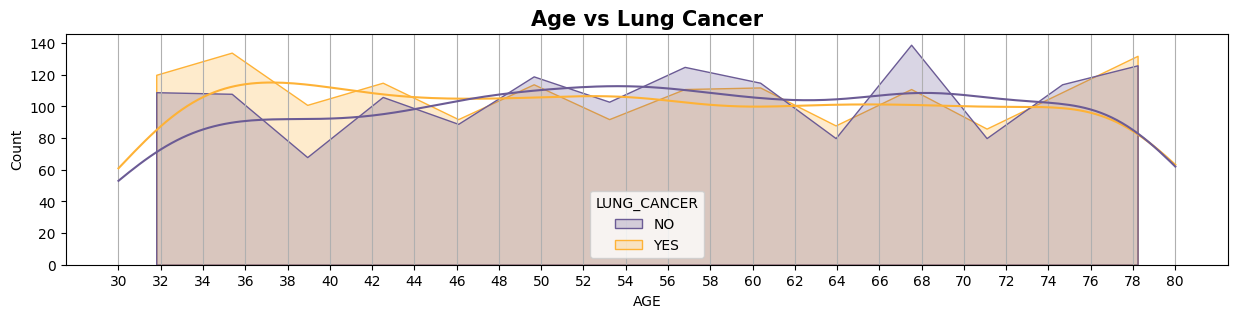

In [16]:
plt.figure(figsize=(15,3))
sns.histplot(df, x="AGE", hue="LUNG_CANCER", element="poly", palette=["#6b5b95","#feb236"], kde=True)
plt.title("Age vs Lung Cancer", fontsize=15,fontweight='bold')
plt.xticks(range(30,82,2))
plt.grid(axis="x")
plt.show()

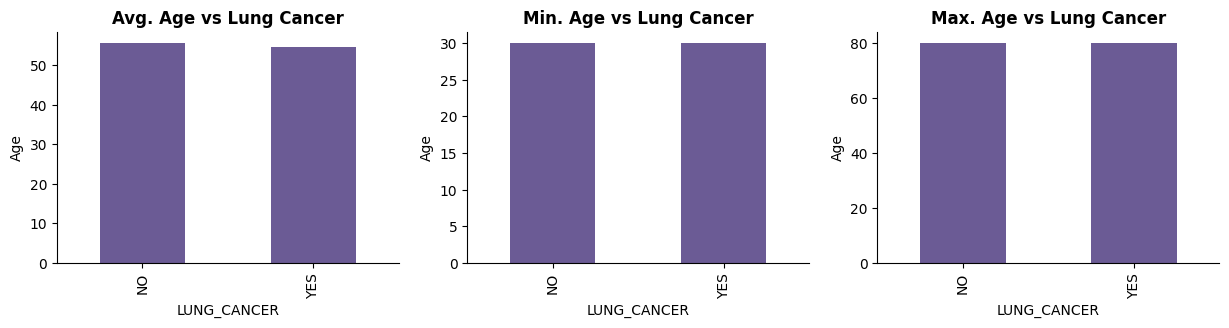

In [17]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
df.groupby("LUNG_CANCER")["AGE"].mean().plot.bar(ylabel="Age", color="#6b5b95")
plt.title("Avg. Age vs Lung Cancer",fontweight='bold')
sns.despine(top=True, right=True, left=False)
plt.subplot(1,3,2)
df.groupby("LUNG_CANCER")["AGE"].min().plot.bar(ylabel="Age", color="#6b5b95")
plt.title("Min. Age vs Lung Cancer",fontweight='bold')
sns.despine(top=True, right=True, left=False)
plt.subplot(1,3,3)
df.groupby("LUNG_CANCER")["AGE"].max().plot.bar(ylabel="Age", title="Max. vs Lung Cancer", color="#6b5b95")
plt.title("Max. Age vs Lung Cancer",fontweight='bold')
sns.despine(top=True, right=True, left=False)
plt.show()

In [18]:
# 
df["Age_Group"] = pd.cut(df["AGE"], bins=[0,30,50,70,100], labels=['0-30', '31-50', '51-70', '71+'])

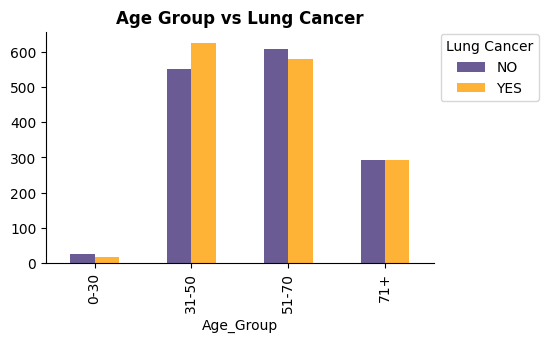

In [19]:
pd.crosstab(df["Age_Group"],df["LUNG_CANCER"]).plot.bar(figsize=(5,3), color=["#6b5b95","#feb236"])
sns.despine(top=True, right=True, left=False)
plt.title("Age Group vs Lung Cancer",fontweight='bold')
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.show()

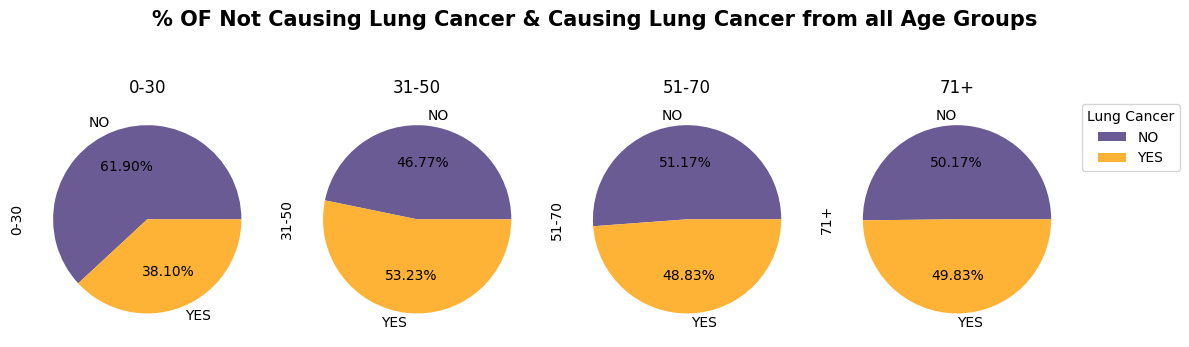

In [20]:
pd.crosstab(df["Age_Group"],df["LUNG_CANCER"]).T.plot.pie(subplots=True, figsize=(12,4), autopct="%0.2f%%", 
                                                          legend=False,colors=["#6b5b95","#feb236"], title=('0-30', '31-50', '51-70', '71+') )
plt.suptitle("% OF Not Causing Lung Cancer & Causing Lung Cancer from all Age Groups", fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.tight_layout()
plt.show()

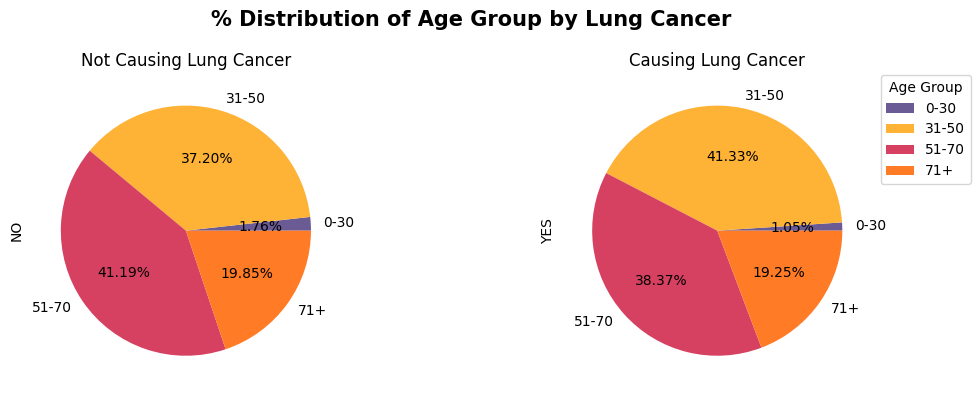

In [21]:
pd.crosstab(df["Age_Group"],df["LUNG_CANCER"]).plot.pie(subplots=True, figsize=(12,4), autopct="%0.2f%%",legend=False,
                                                        colors=["#6b5b95","#feb236","#d64161","#ff7b25"] ,
                                                       title=("Not Causing Lung Cancer", "Causing Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Age Group")
plt.suptitle("% Distribution of Age Group by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

* Average age of lung cancer is above 50 years.
* Minimun and maximum age of lung cancer is 30 years and 80 years respectively.
* Age range 0-30 years has less probability (1.05 %) of lung cancer where  Age range 31-70 years has high probability (41.33 %) of lung cancer rate.
* Older age patients has almost equal ratio of causing lung cancer and not causing lung cancer.
* 48.83 % of patients age between 51-70 years has probability of causing lung cancer.
* Age range 31-50 years has 53.23 %  of causing lung cancer.
* Age below 30 years has 61.90 % of not causing lung cancer.                                                                                                            

In [22]:
def chi_square_test(dataframe):
    dummy = pd.DataFrame(dataframe)
    contingency_table = pd.crosstab(dummy.iloc[:,0],dummy.iloc[:,1])
    chi2_statistic, pval, degrees_of_freedom, expected_table = chi2_contingency(contingency_table)

    #print results
    print("Chi Square Statistic :", chi2_statistic)
    print("p_value :", pval)
    print("Degrees of Freedom :", degrees_of_freedom)

    #Interpretetion
    if pval < 0.05 :
        print(f"There is statistically significant relationship between {dummy.columns[0]} and {dummy.columns[1]}.")
    else:
        print(f"There is no sufficient evidence to conclude relationship bewteen {dummy.columns[0]} and {dummy.columns[1]}")

In [23]:
chi_square_test(df[["Age_Group","LUNG_CANCER"]])

Chi Square Statistic : 7.517518022051129
p_value : 0.0571100433974745
Degrees of Freedom : 3
There is no sufficient evidence to conclude relationship bewteen Age_Group and LUNG_CANCER


* 0-30 years: Lung cancer cases (38.1%)  are relatively rare in this age group.
* 31-50 years: Largest number of cases (1,178), with 627 (53.2%) having lung cancer.
* 51-70 years: Slightly fewer cases than 31-50 (1,192 total), but lung cancer rates are nearly balanced (582 cases or 48.8%).
* 71+ years: Slightly higher (49.8%) rates of lung cancer compared to younger groups.
* Since the p-value ( 0.0571) is slightly greater than 0.05, there is no statistically significant evidence to suggest a relationship between Age Group and Lung Cancer in this dataset.

Based on the test, there is no sufficient evidence to claim that lung cancer occurrence is significantly dependent on age group in this dataset.While the 31-50 age group has the highest percentage of lung cancer cases (53.2%), the variation across age groups is not significant enough to establish a clear relationship.

# Analysis of Smoking with Lung Cancer

In [24]:
df["SMOKING"].value_counts()

SMOKING
1    1525
2    1473
Name: count, dtype: int64

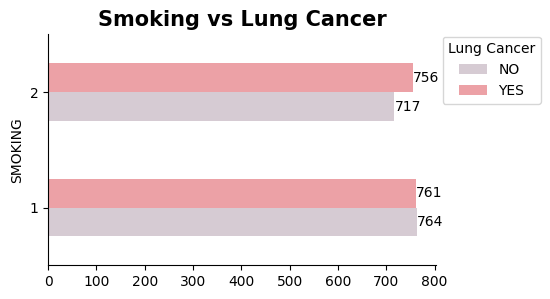

In [25]:
ax = pd.crosstab(df["SMOKING"],df["LUNG_CANCER"]).plot.barh( color=["#d6cbd3","#eca1a6"], figsize=(5,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Smoking vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

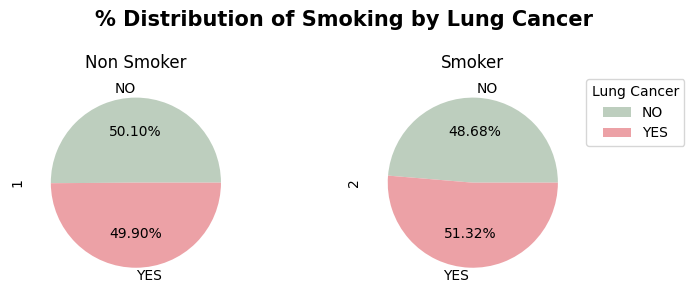

In [26]:
pd.crosstab(df["SMOKING"],df["LUNG_CANCER"]).T.plot.pie(colors=["#bdcebe","#eca1a6"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False,title=("Non Smoker", "Smoker"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Smoking by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [27]:
chi_square_test(df[["SMOKING","LUNG_CANCER"]])

Chi Square Statistic : 0.550726456994636
p_value : 0.45802101606053525
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen SMOKING and LUNG_CANCER


* Total cases: 2,998
* Non-Smokers (SMOKING=1): 
    * 1,525 cases (50.9% of total)
    * 761 out of 1,525 cases (49.89%) have lung cancer.
* Smokers (SMOKING=2): 
    * 1,473 cases (49.1% of total)
    * 756 out of 1,473 cases (51.33%) have lung cancer.
* The proportion of lung cancer is slightly higher among smokers (51.33%) compared to non-smokers (49.89%).
* While the difference is not drastic, smoking still appears to contribute to an increased risk of lung cancer, supporting it as a risk factor.
* Since the p-value is greater than 0.05, this means there is no statistically significant evidence to suggest a relationship between SMOKING and LUNG_CANCER in this dataset.

# Analysis of Yellow Fingers with Lung Cancer

In [28]:
df["YELLOW_FINGERS"].value_counts()

YELLOW_FINGERS
2    1541
1    1457
Name: count, dtype: int64

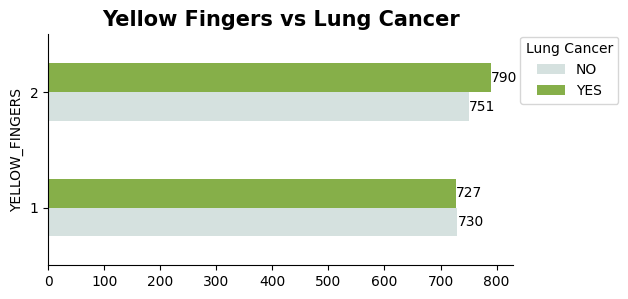

In [29]:
ax = pd.crosstab(df["YELLOW_FINGERS"],df["LUNG_CANCER"]).plot.barh( color=["#d5e1df","#86af49"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Yellow Fingers vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

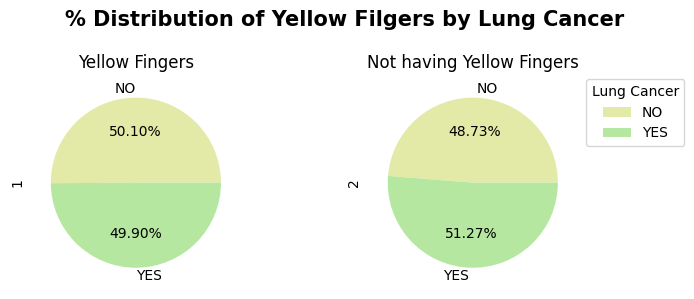

In [30]:
pd.crosstab(df["YELLOW_FINGERS"],df["LUNG_CANCER"]).T.plot.pie(colors=["#e3eaa7","#b5e7a0"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Yellow Fingers", "Not having Yellow Fingers"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Yellow Filgers by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

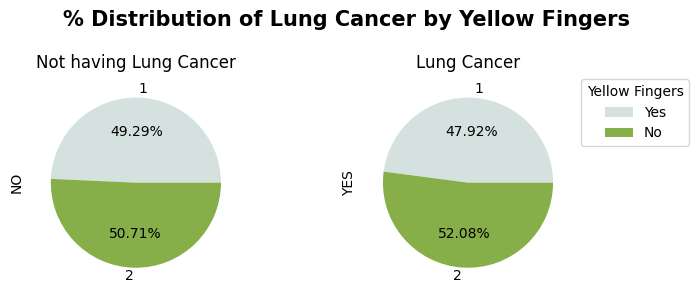

In [31]:
pd.crosstab(df["YELLOW_FINGERS"],df["LUNG_CANCER"]).plot.pie(colors=["#d5e1df","#86af49"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Yellow Fingers", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Yellow Fingers", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [32]:
pd.crosstab(df["YELLOW_FINGERS"],df["LUNG_CANCER"]).T

YELLOW_FINGERS,1,2
LUNG_CANCER,,
NO,730,751
YES,727,790


In [33]:
chi_square_test(df[["YELLOW_FINGERS","LUNG_CANCER"]])

Chi Square Statistic : 0.5075842258761514
p_value : 0.4761865003442318
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen YELLOW_FINGERS and LUNG_CANCER


* YES (Lung Cancer): Out of 1,517 patients who have lung cancer, 727 have yellow fingers (coded as 1), and 790 do not (coded as 2).
* NO (No Lung Cancer): Out of 1,481 patients who do not have lung cancer, 730 have yellow fingers, and 751 do not.
* This shows that both groups (with and without lung cancer) have relatively similar proportions of people with and without yellow fingers.
* In lung cancer patients, the proportion with yellow fingers is 727 / (727 + 790) ≈ 0.48 (48%).
* These proportions are very close, suggesting that yellow fingers may not be a clear differentiator between people with and without lung cancer in this dataset.
* Given the very close proportions (48% vs. 49%) in the two groups, there doesn't appear to be a strong relationship between yellow fingers and lung cancer in this dataset. Yellow fingers do not seem to be a reliable indicator of lung cancer status.

# Analysis of Anxiety with Lung Cancer

In [34]:
df["ANXIETY"].value_counts()

ANXIETY
1    1517
2    1481
Name: count, dtype: int64

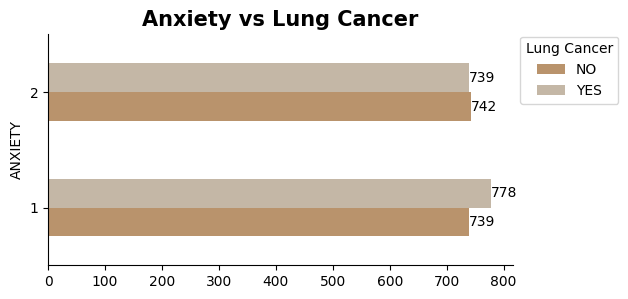

In [35]:
ax = pd.crosstab(df["ANXIETY"],df["LUNG_CANCER"]).plot.barh( color=["#b9936c","#c4b7a6"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Anxiety vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

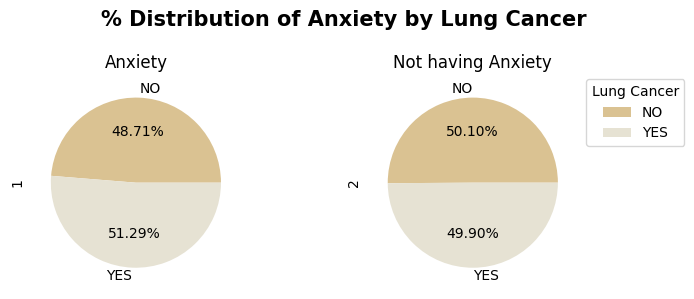

In [36]:
pd.crosstab(df["ANXIETY"],df["LUNG_CANCER"]).T.plot.pie(colors=["#dac292","#e6e2d3"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Anxiety", "Not having Anxiety"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Anxiety by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

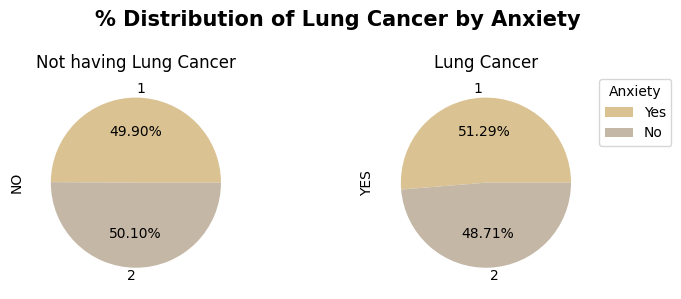

In [37]:
pd.crosstab(df["ANXIETY"],df["LUNG_CANCER"]).plot.pie(colors=["#dac292","#c4b7a6"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Anxiety", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Anxiety", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [38]:
chi_square_test(df[["ANXIETY","LUNG_CANCER"]])

Chi Square Statistic : 0.5223667148351953
p_value : 0.46983385124388455
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen ANXIETY and LUNG_CANCER


In [39]:
pd.crosstab(df["ANXIETY"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
ANXIETY,,
1,739,778
2,742,739


* Lung Cancer : 778 out of 1,517 patients with lung cancer have anxiety, 739 out of 1,517 patients with lung cancer do not have anxiety.
* No Lung Cancer : 739 out of 1,481 patients without lung cancer have anxiety, 742 out of 1,481 patients without lung cancer do not have anxiety.
* In lung cancer patients the proportion of patients with anxiety is (51.3%) and  proportion of patients without anxiety is (48.7%).
* In non-lung cancer patients the proportion of patients with anxiety is (49.9%) and the proportion of patients without anxiety is (50.1%).
* From all Anxiety patients (51.29 %) possibility of having lung cancer.
* From all Non Anxiety patients (49.90 %) which is slightly lower than Anxiety patients possibility of having lung cancer.
* The proportions suggest there is a slight difference between the lung cancer group and the non-lung cancer group in terms of anxiety. However, the difference is not huge.
* Lung cancer patients appear to have a slightly higher proportion of anxiety (51.3%) compared to non-lung cancer patients (49.9%).
*  Since the p-value (0.4698) which is greater than 0.05, This means that there is no statistically significant evidence to conclude that anxiety is associated with lung cancer in this dataset.

# Analysis of Peer Pressure with Lung Cancer

In [40]:
df["PEER_PRESSURE"].value_counts()

PEER_PRESSURE
1    1503
2    1495
Name: count, dtype: int64

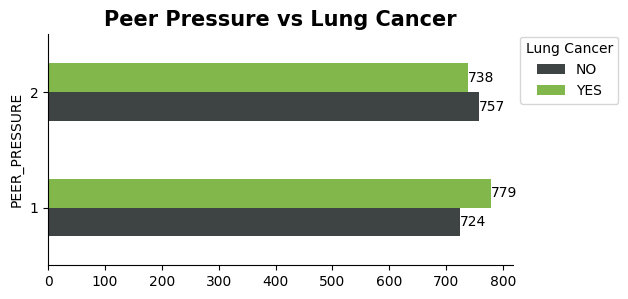

In [41]:
ax = pd.crosstab(df["PEER_PRESSURE"],df["LUNG_CANCER"]).plot.barh( color=["#3e4444","#82b74b"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Peer Pressure vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

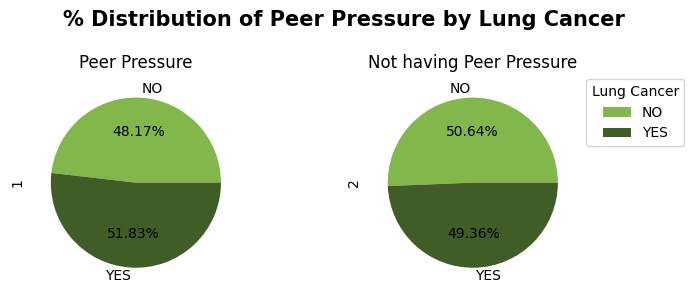

In [42]:
pd.crosstab(df["PEER_PRESSURE"],df["LUNG_CANCER"]).T.plot.pie(colors=["#82b74b","#405d27"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Peer Pressure", "Not having Peer Pressure"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Peer Pressure by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

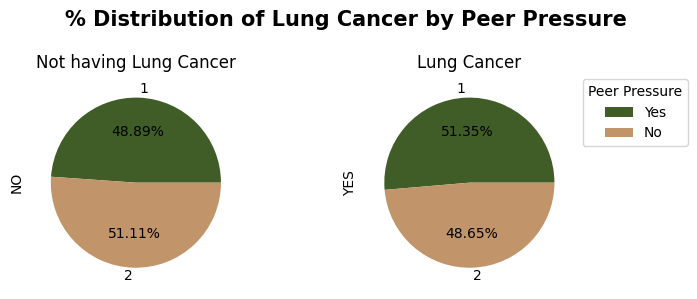

In [43]:
pd.crosstab(df["PEER_PRESSURE"],df["LUNG_CANCER"]).plot.pie(colors=["#405d27","#c1946a"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Peer Pressure", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Peer Pressure", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [44]:
pd.crosstab(df["PEER_PRESSURE"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
PEER_PRESSURE,,
1,724,779
2,757,738


In [45]:
chi_square_test(df[["PEER_PRESSURE","LUNG_CANCER"]])

Chi Square Statistic : 1.7248026794571236
p_value : 0.18907600666024268
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen PEER_PRESSURE and LUNG_CANCER


* Lung Cancer 779 out of 1,517 patients experienced peer pressure and 738 out of 1,517 patients did not experience peer pressure.
* No Lung Cancer 724 out of 1,481 non-lung cancer patients experienced peer pressure and 757 out of 1,481 non-lung cancer patients did not experience peer pressure.
* In lung cancer patients the proportion of patients with peer pressure is (51.35%) and proportion of patients without peer pressure is (48.65%).
* In non-lung cancer patients the proportion of patients with peer pressure is (48.89%) and the proportion of patients without peer pressure is (51.11%).
* From all Peer Pressure patients (51.83 %) possibility of having lung cancer.
* From all Non peer pressure patients (49.36 %) which is slightly lower than peer pressure patients possibility of having lung cancer.
* The distribution of peer pressure across the lung cancer and non-lung cancer groups is close to equal, which suggests there might not be a strong relationship.
* Since the p-value (0.1891) which is greater than 0.05, This means that there is no statistically significant evidence to conclude that peer pressure is associated with lung cancer in this dataset.

# Analysis of Peer Pressure with Lung Cancer

In [46]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


In [47]:
df["CHRONIC_DISEASE"].value_counts()

CHRONIC_DISEASE
2    1528
1    1470
Name: count, dtype: int64

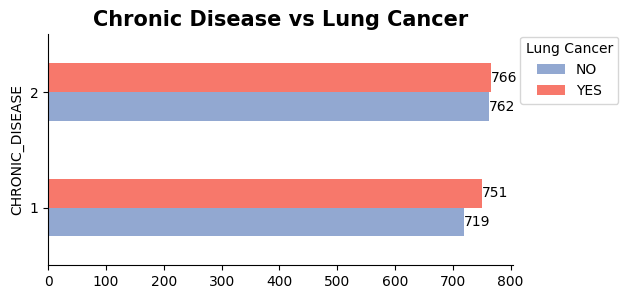

In [48]:
ax = pd.crosstab(df["CHRONIC_DISEASE"],df["LUNG_CANCER"]).plot.barh( color=["#92a8d1","#f7786b"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Chronic Disease vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

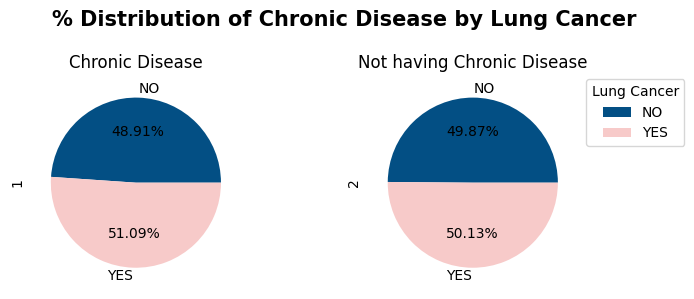

In [49]:
pd.crosstab(df["CHRONIC_DISEASE"],df["LUNG_CANCER"]).T.plot.pie(colors=["#034f84","#f7cac9"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Chronic Disease", "Not having Chronic Disease"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Chronic Disease by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

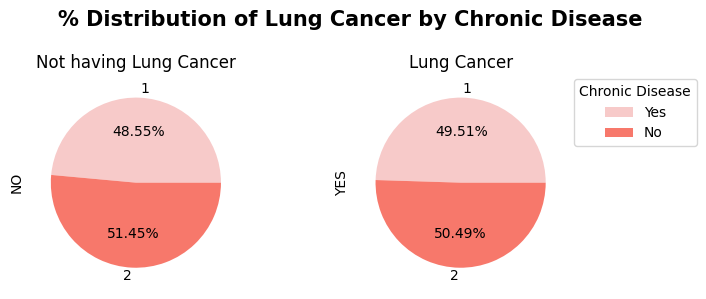

In [50]:
pd.crosstab(df["CHRONIC_DISEASE"],df["LUNG_CANCER"]).plot.pie(colors=["#f7cac9","#f7786b"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Chronic Disease", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Chronic Disease", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [51]:
pd.crosstab(df["CHRONIC_DISEASE"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
CHRONIC_DISEASE,,
1,719,751
2,762,766


In [52]:
chi_square_test(df[["CHRONIC_DISEASE", "LUNG_CANCER"]])

Chi Square Statistic : 0.2378488569631495
p_value : 0.6257641188543879
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen CHRONIC_DISEASE and LUNG_CANCER


* Lung Cancer 751 out of 1,517 patients with lung cancer have chronic disease and 766 out of 1,517 patients with lung cancer do not have chronic disease.
* No Lung Cancer 719 out of 1,481 non-lung cancer patients have chronic disease and 762 out of 1,481 non-lung cancer patients do not have chronic disease.
* In lung cancer patients the proportion of patients with chronic disease is (49.51%) and proportion of patients without chronic disease is (50.49%).
* In non-lung cancer patients the proportion of patients with chronic disease is (48.55%) and the proportion of patients without chronic disease is (51.45%).
* From all chronic disease patients (51.09 %) possibility of having lung cancer.
* From all Non chronic disease patients (50.13 %) which is slightly lower than chronic disease patients possibility of having lung cancer.
* The distribution of chronic disease across the lung cancer and non-lung cancer groups is close to equal, which suggests there might not be a strong relationship.
* Since the p-value (0.6258) which is greater than 0.05, This means that there is no statistically significant evidence to conclude that chronic disease is associated with lung cancer in this dataset.

In [53]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


# Analysis of Fatigue with Lung Cancer

In [54]:
df["FATIGUE"].value_counts()

FATIGUE
1    1530
2    1468
Name: count, dtype: int64

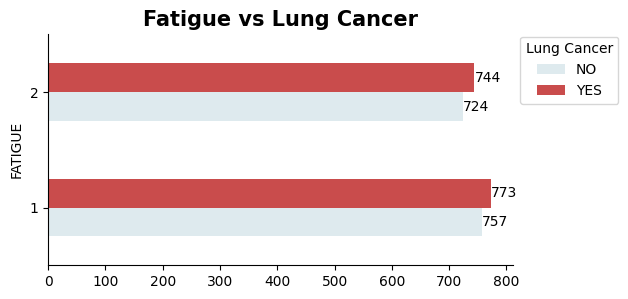

In [55]:
ax = pd.crosstab(df["FATIGUE"],df["LUNG_CANCER"]).plot.barh( color=["#deeaee","#c94c4c"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Fatigue vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

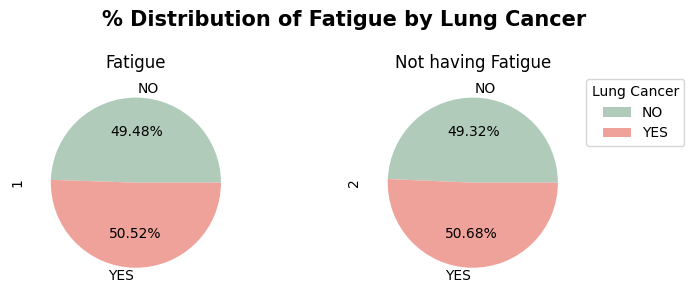

In [56]:
pd.crosstab(df["FATIGUE"],df["LUNG_CANCER"]).T.plot.pie(colors=["#b1cbbb","#eea29a"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Fatigue", "Not having Fatigue"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Fatigue by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

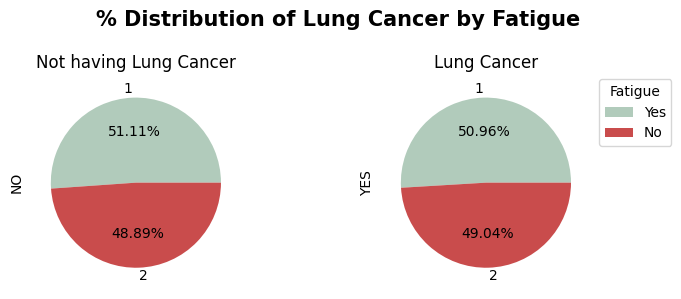

In [57]:
pd.crosstab(df["FATIGUE"],df["LUNG_CANCER"]).plot.pie(colors=["#b1cbbb","#c94c4c"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Fatigue", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Fatigue", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [58]:
pd.crosstab(df["FATIGUE"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
FATIGUE,,
1,757,773
2,724,744


In [59]:
chi_square_test(df[["FATIGUE","LUNG_CANCER"]])

Chi Square Statistic : 0.0025138657801305146
p_value : 0.9600120467775629
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen FATIGUE and LUNG_CANCER


* Lung Cancer 773 out of 1,517 lung cancer patients experienced fatigue and 744 out of 1,517 lung cancer patients did not experience fatigue.
* No Lung Cancer 757 out of 1,481 non-lung cancer patients experienced fatigue and 724 out of 1,481 non-lung cancer patients did not experience fatigue.
* In lung cancer patients the proportion of patients with fatigue is (50.96%) and proportion of patients without fatigue is (49.04%).
* In non-lung cancer patients the proportion of patients with fatigue is (51.11%) and the proportion of patients without fatigue is (48.89%).
* From all fatigue patients (50.52%) possibility of having lung cancer.
* From all Non fatigue patients (50.68%) which is slightly lower than chronic disease patients possibility of having lung cancer.
* The distribution of fatigue across the lung cancer and non fatigue groups is close to equal, which suggests there might not be a strong relationship.
* Since the p-value (0.9600) which is greater than 0.05, This means that there is no statistically significant evidence to conclude that fatigue is associated with lung cancer in this dataset.

# Analysis of Allergy with Lung Cancer

In [60]:
df["ALLERGY"].value_counts()

ALLERGY
2    1520
1    1478
Name: count, dtype: int64

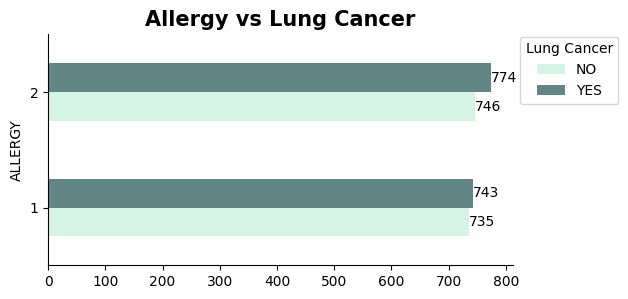

In [61]:
ax = pd.crosstab(df["ALLERGY"],df["LUNG_CANCER"]).plot.barh( color=["#d5f4e6","#618685"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Allergy vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

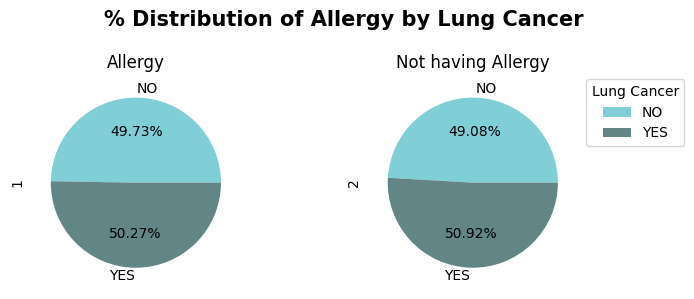

In [62]:
pd.crosstab(df["ALLERGY"],df["LUNG_CANCER"]).T.plot.pie(colors=["#80ced6","#618685"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Allergy", "Not having Allergy"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Allergy by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

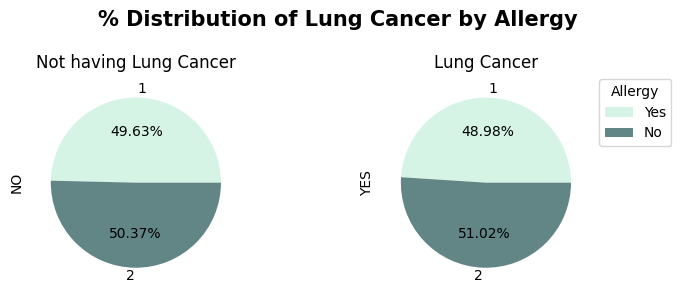

In [63]:
pd.crosstab(df["ALLERGY"],df["LUNG_CANCER"]).plot.pie(colors=["#d5f4e6","#618685"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Allergy", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Allergy", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [64]:
pd.crosstab(df["ALLERGY"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
ALLERGY,,
1,735,743
2,746,774


In [65]:
chi_square_test(df[["ALLERGY","LUNG_CANCER"]])

Chi Square Statistic : 0.10213558708793384
p_value : 0.7492817429785716
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen ALLERGY and LUNG_CANCER


* Lung Cancer 743 out of 1,517 patients with lung cancer have allergies and 774 out of 1,517 patients with lung cancer do not have allergies.
* No Lung Cancer 735 out of 1,481 non-lung cancer patients have allergies and 746 out of 1,481 non-lung cancer patients do not have allergies.
* In lung cancer patients the proportion of patients with allergy is (48.98%) and proportion of patients without allergy is (51.02%).
* In non-lung cancer patients the proportion of patients with allergy is (49.63%) and the proportion of patients without allergy is (50.37%).
* From all allergy patients (50.27%) possibility of having lung cancer.
* From all Non allergy patients (50.92%) which is slightly lower than chronic disease patients possibility of having lung cancer.
* The proportions of patients with and without allergies are similar across lung cancer and non-lung cancer groups. This suggests that there may not be a strong relationship between allergies and lung cancer.
* Since the p-value (0.7493) which is greater than 0.05, This means that there is no statistically significant evidence to conclude that allergy is associated with lung cancer in this dataset.

# Analysis of Wheezing with Lung Cancer

In [66]:
df["WHEEZING"].value_counts()

WHEEZING
1    1507
2    1491
Name: count, dtype: int64

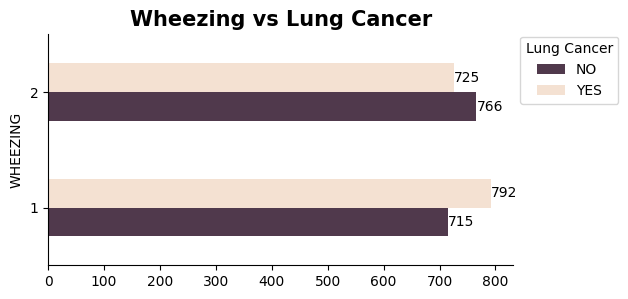

In [67]:
ax = pd.crosstab(df["WHEEZING"],df["LUNG_CANCER"]).plot.barh( color=["#50394c","#f4e1d2"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Wheezing vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

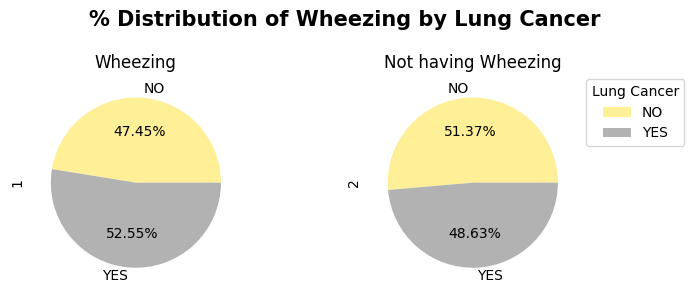

In [68]:
pd.crosstab(df["WHEEZING"],df["LUNG_CANCER"]).T.plot.pie(colors=["#ffef96","#b2b2b2"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Wheezing", "Not having Wheezing"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Wheezing by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

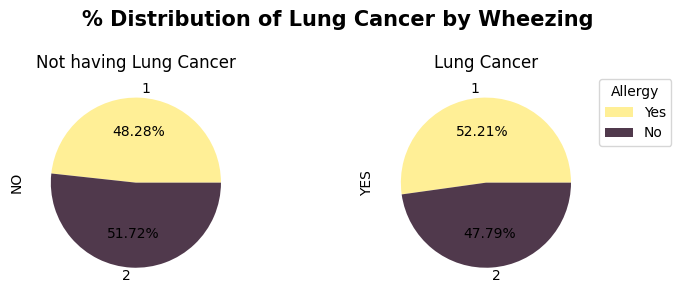

In [69]:
pd.crosstab(df["WHEEZING"],df["LUNG_CANCER"]).plot.pie(colors=["#ffef96","#50394c"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Allergy", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Wheezing", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [70]:
pd.crosstab(df["WHEEZING"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
WHEEZING,,
1,715,792
2,766,725


In [71]:
chi_square_test(df[["WHEEZING","LUNG_CANCER"]])

Chi Square Statistic : 4.4742426155081585
p_value : 0.03440944986811434
Degrees of Freedom : 1
There is statistically significant relationship between WHEEZING and LUNG_CANCER.


* Lung Cancer 792 out of 1,517 patients with lung cancer experience wheezing and 725 out of 1,517 patients with lung cancer do not experience wheezing.
* No Lung Cancer 715 out of 1,481 non-lung cancer patients experience wheezing and 766 out of 1,481 non-lung cancer patients do not experience wheezing.
* In lung cancer patients the proportion of patients with wheezing is (52.21%) and proportion of patients without wheezing is (47.79%).
* In non-lung cancer patients the proportion of patients with wheezing is (48.28%) and the proportion of patients without wheezing is (51.72%).
* From all wheezing patients (52.55%) possibility of having lung cancer.
* From all Non wheezing patients (48.63%) which is slightly lower than wheezing disease patients possibility of having lung cancer.
* A slightly higher proportion of lung cancer patients experience wheezing (52.21%) compared to non-lung cancer patients (48.28%).
* Conversely, a lower proportion of lung cancer patients do not experience wheezing (47.79%) compared to non-lung cancer patients (51.72%).
* Since the p-value (0.0344) is less than 0.05, there is statistically significant evidence to suggest a relationship between Wheezing and Lung Cancer.

# Analysis of Alcohol Consuming with Lung Cancer

In [72]:
df["ALCOHOL_CONSUMING"].value_counts()

ALCOHOL_CONSUMING
1    1525
2    1473
Name: count, dtype: int64

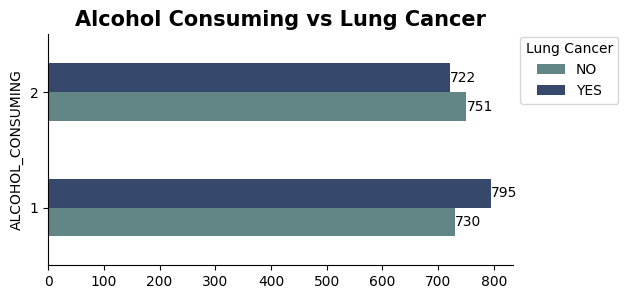

In [73]:
ax = pd.crosstab(df["ALCOHOL_CONSUMING"],df["LUNG_CANCER"]).plot.barh( color=["#618685","#36486b"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Alcohol Consuming vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

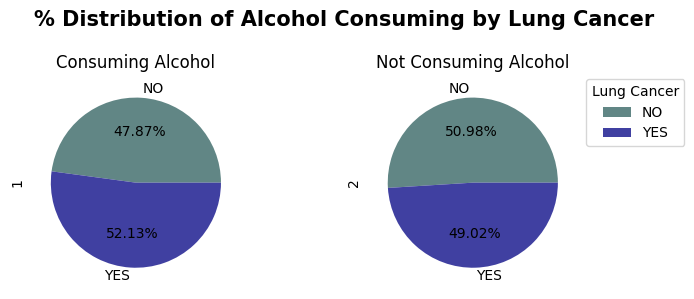

In [74]:
pd.crosstab(df["ALCOHOL_CONSUMING"],df["LUNG_CANCER"]).T.plot.pie(colors=["#618685","#4040a1"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Consuming Alcohol", "Not Consuming Alcohol"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Alcohol Consuming by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

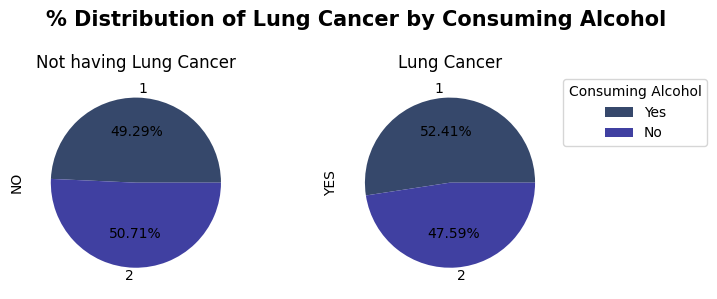

In [75]:
pd.crosstab(df["ALCOHOL_CONSUMING"],df["LUNG_CANCER"]).plot.pie(colors=["#36486b","#4040a1"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Consuming Alcohol", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Consuming Alcohol", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [76]:
pd.crosstab(df["ALCOHOL_CONSUMING"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
ALCOHOL_CONSUMING,,
1,730,795
2,751,722


In [77]:
chi_square_test(df[["ALCOHOL_CONSUMING","LUNG_CANCER"]])

Chi Square Statistic : 2.786262319219789
p_value : 0.09507575147020479
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen ALCOHOL_CONSUMING and LUNG_CANCER


* Lung Cancer 795 out of 1,517 lung cancer patients consume alcohol and 722 out of 1,517 lung cancer patients do not consume alcohol.
* No Lung Cancer 730 out of 1,481 non-lung cancer patients consume alcohol and 751 out of 1,481 non-lung cancer patients do not consume alcohol.
* In lung cancer patients the proportion of patients with consume alcohol is (52.41%) and proportion of patients without consume alcohol is (47.59%).
* In non-lung cancer patients the proportion of patients with consume alcohol is (49.29%) and the proportion of patients without consume alcohol is (50.71%).
* From all alcohol consume patients (52.31%) possibility of having lung cancer.
* From all Non consume alcohol patients (49.02%) which is slightly lower than alcohol consume patients possibility of having lung cancer.
* A slightly higher proportion of lung cancer patients consume alcohol (52.41%) compared to non-lung cancer patients (49.29%).
* Conversely, a slightly lower proportion of lung cancer patients do not consume alcohol (47.59%) compared to non-lung cancer patients (50.71%).
* Since the p-value (0.0951) is greater than 0.05, there is no statistically significant evidence to suggest a relationship between Alcohol Consumption and Lung Cancer.

# Analysis of Coughing with Lung Cancer

In [78]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


In [79]:
df["COUGHING"].value_counts()

COUGHING
2    1530
1    1468
Name: count, dtype: int64

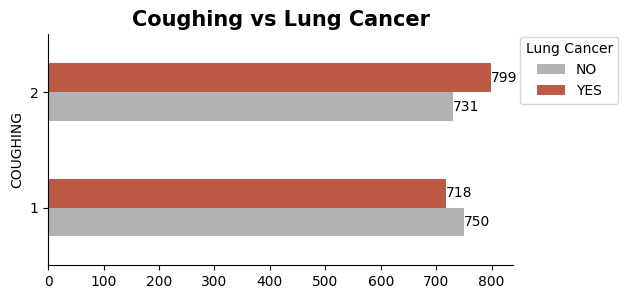

In [80]:
ax = pd.crosstab(df["COUGHING"],df["LUNG_CANCER"]).plot.barh( color=["#b2b2b2","#bc5a45"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Coughing vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

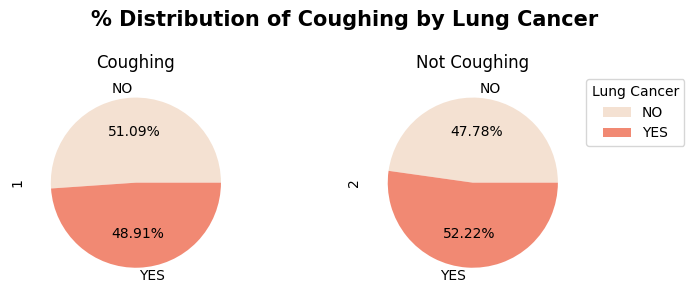

In [81]:
pd.crosstab(df["COUGHING"],df["LUNG_CANCER"]).T.plot.pie(colors=["#f4e1d2","#f18973"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Coughing", "Not Coughing"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Coughing by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

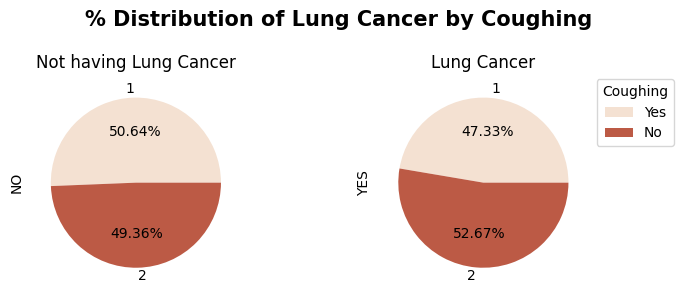

In [82]:
pd.crosstab(df["COUGHING"],df["LUNG_CANCER"]).plot.pie(colors=["#f4e1d2","#bc5a45"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Coughing", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Coughing", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [83]:
pd.crosstab(df["COUGHING"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
COUGHING,,
1,750,718
2,731,799


In [84]:
chi_square_test(df[["COUGHING","LUNG_CANCER"]])

Chi Square Statistic : 3.1567860724690555
p_value : 0.07561190585236194
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen COUGHING and LUNG_CANCER


* Lung Cancer 718 out of 1,517 lung cancer patients experience coughing and 799 out of 1,517 lung cancer patients do not experience coughing.
* No Lung Cancer 750 out of 1,481 non-lung cancer patients experience coughing and 731 out of 1,481 non-lung cancer patients do not experience coughing.
* In lung cancer patients the proportion of patients with coughing is (47.33%) and proportion of patients without coughing is (52.67%).
* In non-lung cancer patients the proportion of patients with coughing is (50.64%) and the proportion of patients without coughing is (50.64%).
* From all coughing patients (48.91%) possibility of having lung cancer.
* From all Non coughing  patients (52.22%) which is slightly higher than coughing patients possibility of having lung cancer.
* The proportions of patients with and without coughing are very similar across the lung cancer and non-lung cancer groups, although there is a slight tendency for more lung cancer patients not to experience coughing (52.62%) compared to non-lung cancer patients (49.33%).
* Since the p-value (0.0756) is greater than 0.05, there is no statistically significant evidence to suggest a relationship between Coughing and Lung Cancer.

# Analysis of Shortness of Breath with Lung Cancer

In [85]:
df["SHORTNESS_OF_BREATH"].value_counts()

SHORTNESS_OF_BREATH
1    1536
2    1462
Name: count, dtype: int64

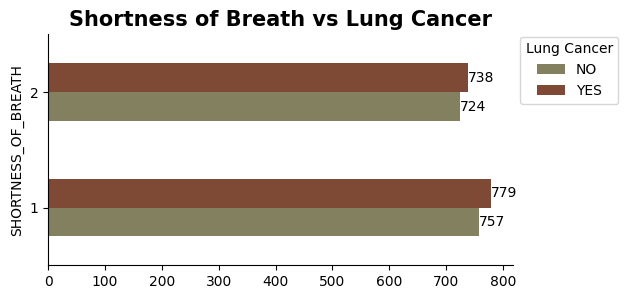

In [86]:
ax = pd.crosstab(df["SHORTNESS_OF_BREATH"],df["LUNG_CANCER"]).plot.barh( color=["#838060","#7e4a35"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Shortness of Breath vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

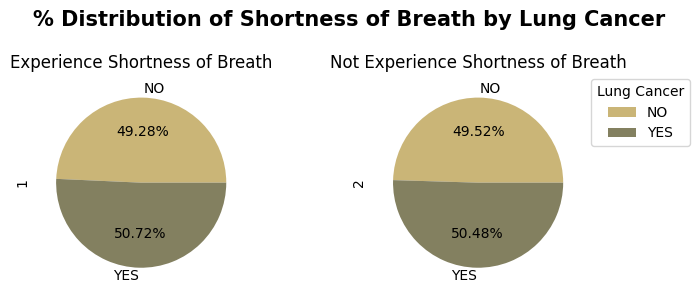

In [87]:
pd.crosstab(df["SHORTNESS_OF_BREATH"],df["LUNG_CANCER"]).T.plot.pie(colors=["#cab577","#838060"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Experience Shortness of Breath", 
                                                                                           "Not Experience Shortness of Breath"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Shortness of Breath by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

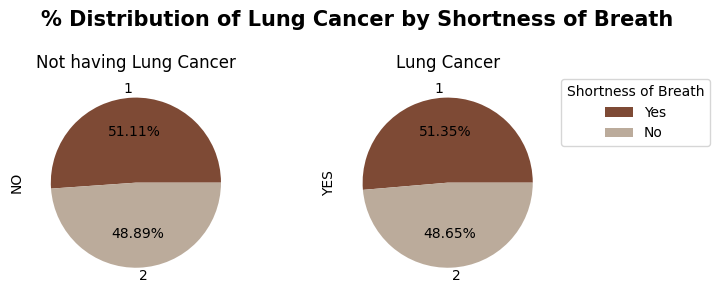

In [88]:
pd.crosstab(df["SHORTNESS_OF_BREATH"],df["LUNG_CANCER"]).plot.pie(colors=["#7e4a35","#bbab9b"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Shortness of Breath", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Shortness of Breath", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [89]:
pd.crosstab(df["SHORTNESS_OF_BREATH"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
SHORTNESS_OF_BREATH,,
1,757,779
2,724,738


In [90]:
chi_square_test(df[["SHORTNESS_OF_BREATH","LUNG_CANCER"]])

Chi Square Statistic : 0.008721209212038197
p_value : 0.9255957884899272
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen SHORTNESS_OF_BREATH and LUNG_CANCER


* Lung Cancer 779 out of 1,517 lung cancer patients experience shortness of breath and 738 out of 1,517 lung cancer patients do not experience shortness of breath.
* No Lung Cancer 757 out of 1,481 non-lung cancer patients experience shortness of breath and 724 out of 1,481 non-lung cancer patients do not experience shortness of breath.
* In lung cancer patients the proportion of patients with experience shortness of breath is (51.35%) and proportion of patients without experience shortness of breath is (48.65%).
* In non-lung cancer patients the proportion of patients with experience shortness of breath is (51.11%) and the proportion of patients without experience shortness of breath is (48.89%).
* From all experience shortness of breath patients (50.72%) possibility of having lung cancer.
* From all Non experience shortness of breath patients (50.48%) which is slightly higher than experience shortness of breath patients possibility of having lung cancer.
* The proportions of patients with and without shortness of breath are very similar across the lung cancer and non-lung cancer groups.
* A slightly higher proportion of lung cancer patients experience shortness of breath (51.35%) compared to non-lung cancer patients (51.11%).
* Since the p-value (0.9255) is much greater than 0.05, there is no statistically significant evidence to suggest a relationship between Shortness of Breath and Lung Cancer.

# Analysis of Swallowing Difficulty with Lung Cancer

In [91]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


In [92]:
df["SWALLOWING_DIFFICULTY"].value_counts()

SWALLOWING_DIFFICULTY
1    1529
2    1469
Name: count, dtype: int64

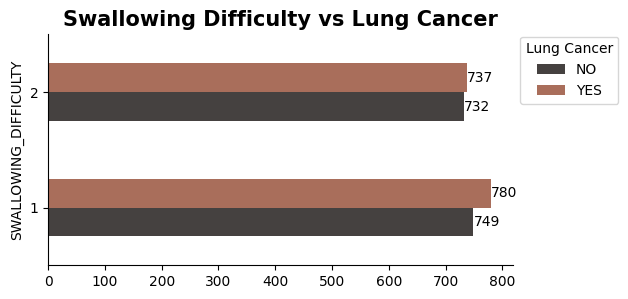

In [93]:
ax = pd.crosstab(df["SWALLOWING_DIFFICULTY"],df["LUNG_CANCER"]).plot.barh( color=["#454140","#a96e5b"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Swallowing Difficulty vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

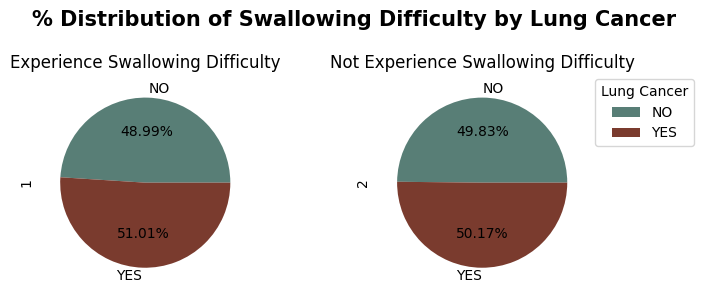

In [94]:
pd.crosstab(df["SWALLOWING_DIFFICULTY"],df["LUNG_CANCER"]).T.plot.pie(colors=["#587e76","#7a3b2e"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Experience Swallowing Difficulty", 
                                                                                           "Not Experience Swallowing Difficulty"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Swallowing Difficulty by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

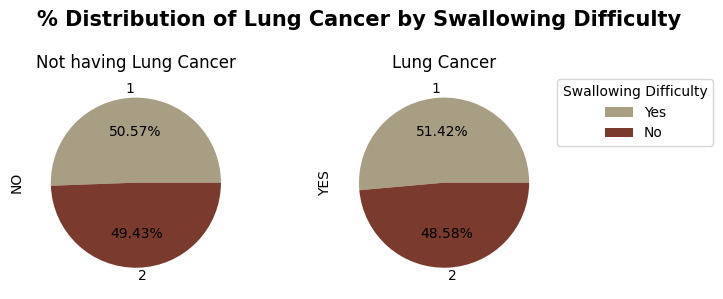

In [95]:
pd.crosstab(df["SWALLOWING_DIFFICULTY"],df["LUNG_CANCER"]).plot.pie(colors=["#a79e84","#7a3b2e"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Swallowing Difficulty", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Swallowing Difficulty", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [96]:
pd.crosstab(df["SWALLOWING_DIFFICULTY"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
SWALLOWING_DIFFICULTY,,
1,749,780
2,732,737


In [97]:
chi_square_test(df[["SWALLOWING_DIFFICULTY","LUNG_CANCER"]])

Chi Square Statistic : 0.18086436716628962
p_value : 0.6706314670199196
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen SWALLOWING_DIFFICULTY and LUNG_CANCER


* Lung Cancer 780 out of 1,517 lung cancer patients experience swallowing difficulty and 737 out of 1,517 lung cancer patients do not experience swallowing difficulty.
* 749 out of 1,481 non-lung cancer patients experience swallowing difficulty and 732 out of 1,481 non-lung cancer patients do not experience swallowing difficulty.
* In lung cancer patients the proportion of patients with experience swallowing difficulty is (51.42%) and proportion of patients without experience swallowing difficulty is (48.58%).
* In non-lung cancer patients the proportion of patients with experience is (50.57%) and the proportion of patients without experience swallowing difficulty is (49.43%).
* From all experience swallowing difficulty patients (51.01%) possibility of having lung cancer.
* From all Non experience swallowing difficulty patients (50.17%) which is slightly higher than experience swallowing difficulty patients possibility of having lung cancer.
* The proportions of patients with and without swallowing difficulty are very similar across the lung cancer and non-lung cancer groups.
* There is no obvious difference that strongly associates swallowing difficulty with lung cancer.
* Since the p-value (0.6706) is significantly greater than 0.05, there is no statistically significant evidence to suggest a relationship between Swallowing Difficulty and Lung Cancer.

# Analysis of Chest Pain with Lung Cancer

In [98]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


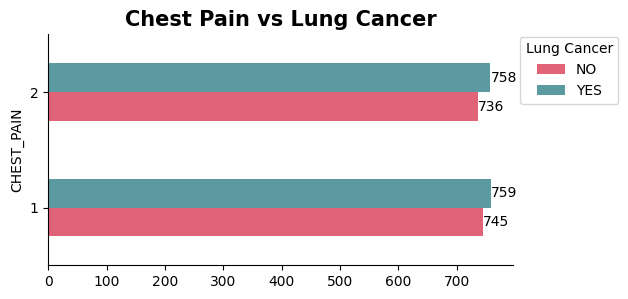

In [99]:
ax = pd.crosstab(df["CHEST_PAIN"],df["LUNG_CANCER"]).plot.barh( color=["#e06377","#5b9aa0"], figsize=(6,3))
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
sns.despine(top=True, right=True, left=False)
plt.title("Chest Pain vs Lung Cancer",fontsize=15,fontweight='bold')
plt.show()

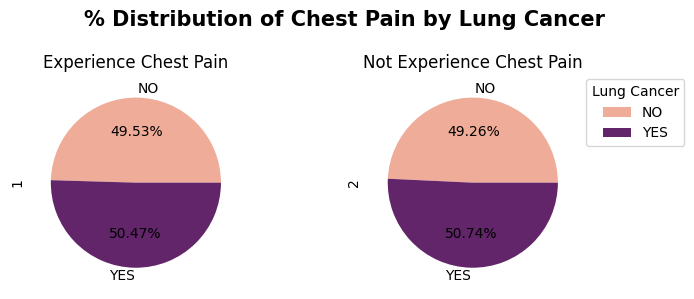

In [100]:
pd.crosstab(df["CHEST_PAIN"],df["LUNG_CANCER"]).T.plot.pie(colors=["#eeac99","#622569"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Experience Chest Pain", 
                                                                                           "Not Experience Chest Pain"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Lung Cancer")
plt.suptitle("% Distribution of Chest Pain by Lung Cancer", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

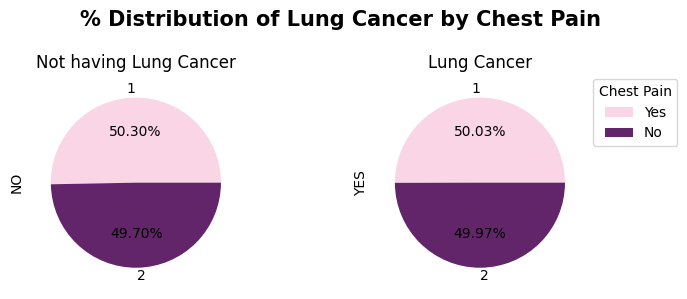

In [101]:
pd.crosstab(df["CHEST_PAIN"],df["LUNG_CANCER"]).plot.pie(colors=["#f9d5e5","#622569"], figsize=(8,3), autopct="%.2f%%",
                                                       subplots=True, legend=False, title=("Not having Lung Cancer", "Lung Cancer"))
plt.legend(bbox_to_anchor=(1,1.02), loc="upper left", title="Chest Pain", labels=["Yes", "No"])
plt.suptitle("% Distribution of Lung Cancer by Chest Pain", fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

In [102]:
pd.crosstab(df["CHEST_PAIN"],df["LUNG_CANCER"])

LUNG_CANCER,NO,YES
CHEST_PAIN,,
1,745,759
2,736,758


In [103]:
chi_square_test(df[["CHEST_PAIN","LUNG_CANCER"]])

Chi Square Statistic : 0.012495396331856938
p_value : 0.9109956187147146
Degrees of Freedom : 1
There is no sufficient evidence to conclude relationship bewteen CHEST_PAIN and LUNG_CANCER


* Lung Cancer 759 out of 1,517 lung cancer patients experience chest pain and 758 out of 1,517 lung cancer patients do not experience chest pain.
* No Lung Cancer 745 out of 1,481 non-lung cancer patients experience chest pain and 736 out of 1,481 non-lung cancer patients do not experience chest pain.
* In lung cancer patients the proportion of patients with experience chest pain is (50.03%) and proportion of patients without experience chest pain is (49.97%).
* In non-lung cancer patients the proportion of patients with experience chest pain is (50.30%) and the proportion of patients without experience chest pain is (49.70%).
* From all experience chest pain patients (50.47%) possibility of having lung cancer.
From all Non experience chest pain patients (50.74%) which is slightly higher than experience chest pain patients possibility of having lung cancer.
* The proportions of patients with and without chest pain are almost identical across lung cancer and non-lung cancer groups.
* There is no visible evidence of a strong association between Chest Pain and Lung Cancer.
* Since the p-value (0.9109) is much greater than 0.05,  there is no statistically significant evidence to suggest a relationship between Chest Pain and Lung Cancer.

# Scaling Data

In [104]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES,71+
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES,51-70
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO,71+


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   GENDER                 2998 non-null   object  
 1   AGE                    2998 non-null   int64   
 2   SMOKING                2998 non-null   int64   
 3   YELLOW_FINGERS         2998 non-null   int64   
 4   ANXIETY                2998 non-null   int64   
 5   PEER_PRESSURE          2998 non-null   int64   
 6   CHRONIC_DISEASE        2998 non-null   int64   
 7   FATIGUE                2998 non-null   int64   
 8   ALLERGY                2998 non-null   int64   
 9   WHEEZING               2998 non-null   int64   
 10  ALCOHOL_CONSUMING      2998 non-null   int64   
 11  COUGHING               2998 non-null   int64   
 12  SHORTNESS_OF_BREATH    2998 non-null   int64   
 13  SWALLOWING_DIFFICULTY  2998 non-null   int64   
 14  CHEST_PAIN             2998 non-null   int64 

In [106]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER', 'Age_Group'],
      dtype='object')

In [107]:
numerical_cols = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
categorical_cols = ["GENDER","Age_Group"]

In [108]:
encoded = OneHotEncoder(sparse_output=False)

In [109]:
data = encoded.fit_transform(df[categorical_cols])

In [110]:
data

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [111]:
column_names = encoded.get_feature_names_out()
column_names

array(['GENDER_F', 'GENDER_M', 'Age_Group_0-30', 'Age_Group_31-50',
       'Age_Group_51-70', 'Age_Group_71+'], dtype=object)

In [112]:
scalar = StandardScaler()

In [113]:
scaled_data = scalar.fit_transform(df[numerical_cols])
scaled_data

array([[ 0.66743552, -0.98280295, -1.02842244, ...,  1.02499541,
         1.02021768, -0.99666999],
       [-0.01164263, -0.98280295,  0.97236307, ..., -0.97561412,
         1.02021768,  1.00334114],
       [ 1.55023712,  1.01749796,  0.97236307, ...,  1.02499541,
        -0.98018298, -0.99666999],
       ...,
       [ 0.46371207,  1.01749796,  0.97236307, ...,  1.02499541,
         1.02021768,  1.00334114],
       [-1.70933802, -0.98280295, -1.02842244, ...,  1.02499541,
        -0.98018298,  1.00334114],
       [-1.03025987, -0.98280295,  0.97236307, ..., -0.97561412,
        -0.98018298, -0.99666999]])

In [114]:
out_encoded = LabelEncoder()

In [115]:
rec = out_encoded.fit_transform(df[["LUNG_CANCER"]])
rec

array([0, 0, 1, ..., 1, 1, 1])

In [116]:
new_df = pd.DataFrame(data, columns=column_names)
new_df.head()

,GENDER_F,GENDER_M,Age_Group_0-30,Age_Group_31-50,Age_Group_51-70,Age_Group_71+
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [117]:
new_df2 = pd.DataFrame(scaled_data, columns=numerical_cols)
new_df2

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,0.667436,-0.982803,-1.028422,-0.988063,1.002672,0.980837,-0.979529,0.986087,1.005351,1.017498,0.979529,1.024995,1.020218,-0.996670
1,-0.011643,-0.982803,0.972363,1.012081,-0.997335,-1.019537,1.020899,0.986087,1.005351,-0.982803,-1.020899,-0.975614,1.020218,1.003341
2,1.550237,1.017498,0.972363,-0.988063,-0.997335,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,1.024995,-0.980183,-0.996670
3,0.327896,1.017498,-1.028422,-0.988063,-0.997335,0.980837,-0.979529,0.986087,-0.994677,-0.982803,0.979529,-0.975614,1.020218,1.003341
4,1.686053,-0.982803,-1.028422,1.012081,-0.997335,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,-0.975614,-0.980183,1.003341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.074882,1.017498,-1.028422,-0.988063,1.002672,0.980837,-0.979529,-1.014109,-0.994677,-0.982803,0.979529,-0.975614,-0.980183,1.003341
2994,1.346514,-0.982803,0.972363,-0.988063,-0.997335,-1.019537,1.020899,0.986087,1.005351,1.017498,-1.020899,-0.975614,1.020218,-0.996670
2995,0.463712,1.017498,0.972363,1.012081,-0.997335,0.980837,1.020899,0.986087,1.005351,-0.982803,-1.020899,1.024995,1.020218,1.003341
2996,-1.709338,-0.982803,-1.028422,1.012081,1.002672,0.980837,1.020899,0.986087,1.005351,1.017498,-1.020899,1.024995,-0.980183,1.003341


In [118]:
final_df = pd.concat([new_df,new_df2], axis=1)
final_df

,GENDER_F,GENDER_M,Age_Group_0-30,Age_Group_31-50,Age_Group_51-70,Age_Group_71+,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,0.0,1.0,0.0,0.0,1.0,0.0,0.667436,-0.982803,-1.028422,-0.988063,1.002672,0.980837,-0.979529,0.986087,1.005351,1.017498,0.979529,1.024995,1.020218,-0.996670
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.011643,-0.982803,0.972363,1.012081,-0.997335,-1.019537,1.020899,0.986087,1.005351,-0.982803,-1.020899,-0.975614,1.020218,1.003341
2,1.0,0.0,0.0,0.0,0.0,1.0,1.550237,1.017498,0.972363,-0.988063,-0.997335,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,1.024995,-0.980183,-0.996670
3,0.0,1.0,0.0,0.0,1.0,0.0,0.327896,1.017498,-1.028422,-0.988063,-0.997335,0.980837,-0.979529,0.986087,-0.994677,-0.982803,0.979529,-0.975614,1.020218,1.003341
4,1.0,0.0,0.0,0.0,0.0,1.0,1.686053,-0.982803,-1.028422,1.012081,-0.997335,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,-0.975614,-0.980183,1.003341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.0,0.0,0.0,0.0,0.0,1.0,1.074882,1.017498,-1.028422,-0.988063,1.002672,0.980837,-0.979529,-1.014109,-0.994677,-0.982803,0.979529,-0.975614,-0.980183,1.003341
2994,1.0,0.0,0.0,0.0,0.0,1.0,1.346514,-0.982803,0.972363,-0.988063,-0.997335,-1.019537,1.020899,0.986087,1.005351,1.017498,-1.020899,-0.975614,1.020218,-0.996670
2995,1.0,0.0,0.0,0.0,1.0,0.0,0.463712,1.017498,0.972363,1.012081,-0.997335,0.980837,1.020899,0.986087,1.005351,-0.982803,-1.020899,1.024995,1.020218,1.003341
2996,0.0,1.0,1.0,0.0,0.0,0.0,-1.709338,-0.982803,-1.028422,1.012081,1.002672,0.980837,1.020899,0.986087,1.005351,1.017498,-1.020899,1.024995,-0.980183,1.003341


In [119]:
final_df["Lung_Cancer"] = rec
final_df

,GENDER_F,GENDER_M,Age_Group_0-30,Age_Group_31-50,Age_Group_51-70,Age_Group_71+,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,...,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,Lung_Cancer
0,0.0,1.0,0.0,0.0,1.0,0.0,0.667436,-0.982803,-1.028422,-0.988063,...,0.980837,-0.979529,0.986087,1.005351,1.017498,0.979529,1.024995,1.020218,-0.996670,0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.011643,-0.982803,0.972363,1.012081,...,-1.019537,1.020899,0.986087,1.005351,-0.982803,-1.020899,-0.975614,1.020218,1.003341,0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.550237,1.017498,0.972363,-0.988063,...,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,1.024995,-0.980183,-0.996670,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.327896,1.017498,-1.028422,-0.988063,...,0.980837,-0.979529,0.986087,-0.994677,-0.982803,0.979529,-0.975614,1.020218,1.003341,1
4,1.0,0.0,0.0,0.0,0.0,1.0,1.686053,-0.982803,-1.028422,1.012081,...,-1.019537,1.020899,-1.014109,1.005351,-0.982803,-1.020899,-0.975614,-0.980183,1.003341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.0,0.0,0.0,0.0,0.0,1.0,1.074882,1.017498,-1.028422,-0.988063,...,0.980837,-0.979529,-1.014109,-0.994677,-0.982803,0.979529,-0.975614,-0.980183,1.003341,0
2994,1.0,0.0,0.0,0.0,0.0,1.0,1.346514,-0.982803,0.972363,-0.988063,...,-1.019537,1.020899,0.986087,1.005351,1.017498,-1.020899,-0.975614,1.020218,-0.996670,0
2995,1.0,0.0,0.0,0.0,1.0,0.0,0.463712,1.017498,0.972363,1.012081,...,0.980837,1.020899,0.986087,1.005351,-0.982803,-1.020899,1.024995,1.020218,1.003341,1
2996,0.0,1.0,1.0,0.0,0.0,0.0,-1.709338,-0.982803,-1.028422,1.012081,...,0.980837,1.020899,0.986087,1.005351,1.017498,-1.020899,1.024995,-0.980183,1.003341,1


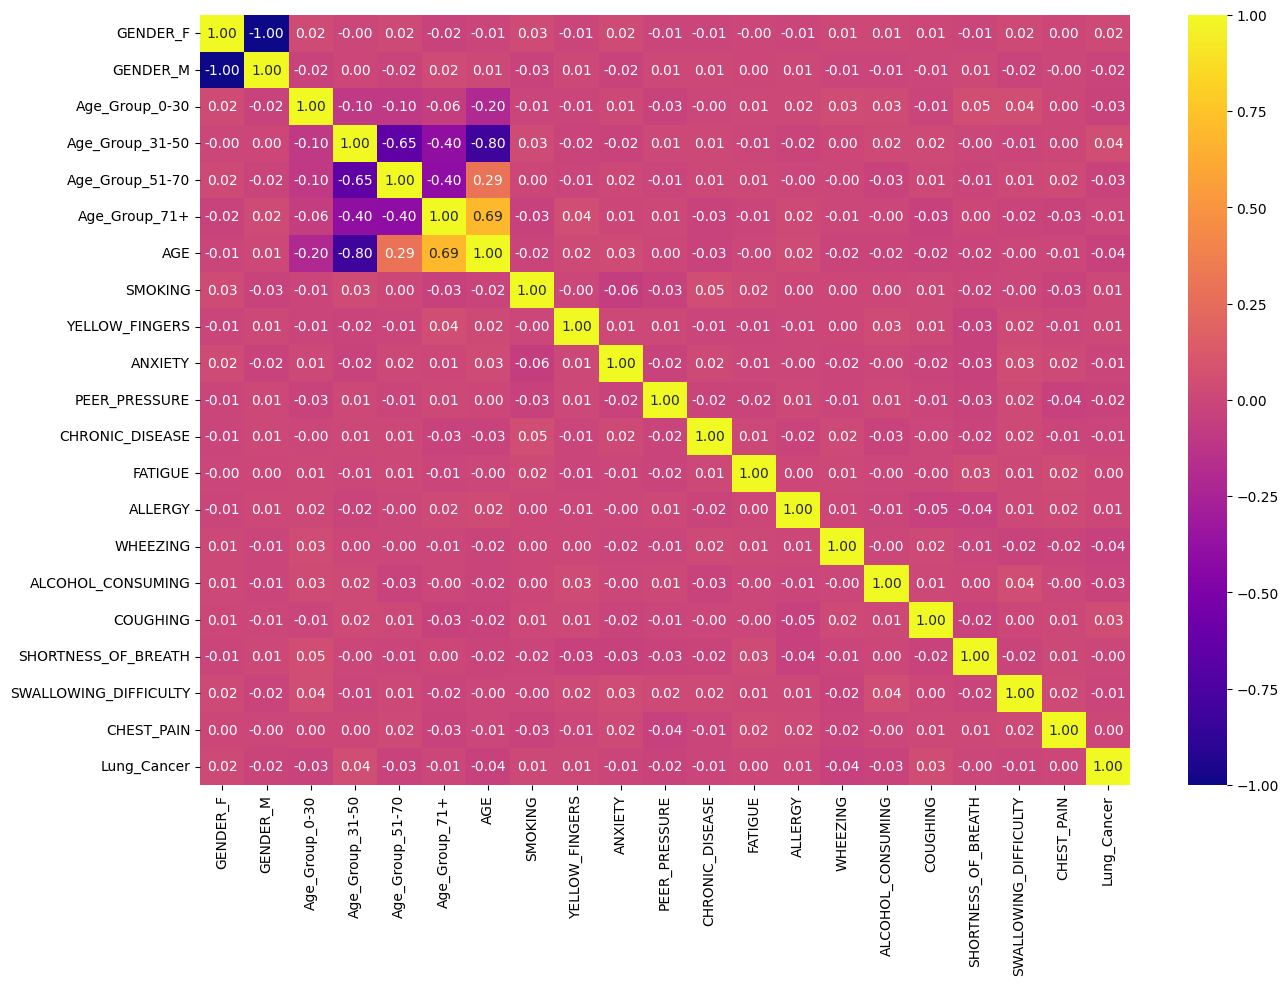

In [120]:
plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="plasma")
plt.show()

# Checking if Data is Imbalance

In [121]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    1517
NO     1481
Name: count, dtype: int64

* Data appears to be balanced because the classes YES (representing patients with lung cancer) and NO (representing patients without lung cancer) are fairly close in number.
* the ratio between the two classes is:
    * 1517 / (1517 + 1481) = 50.6% (YES)
    * 1481 / (1517 + 1481) = 49.4% (NO)
* This indicates that the dataset is almost evenly split, with a slight edge for YES.

# Train Test Splitting the Data for Training and Testing Purpose

In [122]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER,Age_Group
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO,51-70
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO,51-70


In [123]:
X = df.drop(["LUNG_CANCER","Age_Group"], axis=1)
y = df["LUNG_CANCER"]

In [124]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=45)

# Creating Pipeline for

* Converting numerical column into Standard Scalar.
* Converting categorical column into numerical column using OneHotEncoding.
* Automating all these steps into model building for supervised learning model.

In [125]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER', 'Age_Group'],
      dtype='object')

In [126]:
numerical_columns = ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
categorical_columns = ['GENDER']

In [127]:
numerical_pipeline = Pipeline(steps=[
    ("scalar", StandardScaler())
])

In [128]:
categorical_pipeline = Pipeline(steps=[
    ("ohehot", OneHotEncoder(drop="first", dtype=int))
])

In [129]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_pipeline, numerical_columns),
    ("cat", categorical_pipeline, categorical_columns)
])

# Logistic Regression

In [130]:
log_reg_pipeline = Pipeline(steps=[
    ("prerprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

In [131]:
log_reg_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('prerprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', LogisticRegression())])

In [132]:
print("Training Score :", log_reg_pipeline.score(X_tr, y_tr))

y_pred = log_reg_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.5387823185988324
Testing Score : 0.5033333333333333
              precision    recall  f1-score   support

          NO       0.47      0.50      0.49       283
         YES       0.53      0.50      0.52       317

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



# Decision Tree

In [133]:
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

In [134]:
dt_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', DecisionTreeClassifier())])

In [135]:
print("Training Score :", dt_pipeline.score(X_tr, y_tr))

y_pred = dt_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.9991659716430359
Testing Score : 0.49333333333333335
              precision    recall  f1-score   support

          NO       0.47      0.49      0.48       283
         YES       0.52      0.49      0.51       317

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.50      0.49      0.49       600



# Random Forest

In [136]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [137]:
rf_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', RandomForestClassifier())])

In [138]:
print("Training Score :", rf_pipeline.score(X_tr, y_tr))

y_pred = rf_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.9991659716430359
Testing Score : 0.505
              precision    recall  f1-score   support

          NO       0.48      0.52      0.50       283
         YES       0.53      0.49      0.51       317

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.50       600
weighted avg       0.51      0.51      0.51       600



# Naive Bayes

In [139]:
nb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", BernoulliNB())
])

In [140]:
nb_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', BernoulliNB())])

In [141]:
print("Training Score :", nb_pipeline.score(X_tr, y_tr))

y_pred = nb_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.542535446205171
Testing Score : 0.49333333333333335
              precision    recall  f1-score   support

          NO       0.46      0.48      0.47       283
         YES       0.52      0.50      0.51       317

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600



# SVM Linear

In [142]:
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="linear"))
])

In [143]:
svm_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', SVC(kernel='linear'))])

In [144]:
print("Training Score :", svm_pipeline.score(X_tr, y_tr))

y_pred = svm_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.5287739783152627
Testing Score : 0.48333333333333334
              precision    recall  f1-score   support

          NO       0.45      0.46      0.46       283
         YES       0.51      0.50      0.51       317

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



# KNN

In [145]:
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier())
])

In [146]:
knn_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', KNeighborsClassifier())])

In [147]:
print("Training Score :", knn_pipeline.score(X_tr, y_tr))

y_pred = knn_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.7018348623853211
Testing Score : 0.5033333333333333
              precision    recall  f1-score   support

          NO       0.47      0.49      0.48       283
         YES       0.53      0.51      0.52       317

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



# Adaboost

In [148]:
ada_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", AdaBoostClassifier(estimator=LogisticRegression()))
])

In [149]:
ada_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier',
                 AdaBoostClassifier(estimator=LogisticRegression()))])

In [150]:
print("Training Score :", ada_pipeline.score(X_tr, y_tr))

y_pred = ada_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.5387823185988324
Testing Score : 0.5016666666666667
              precision    recall  f1-score   support

          NO       0.47      0.50      0.49       283
         YES       0.53      0.50      0.52       317

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



# Gradient Boosting

In [151]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=200))
])

In [152]:
gb_pipeline.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC_DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL_CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS_OF_BREATH',
                                                   'SWALLOWING_DIFFICULTY',
                                                   'CHEST_PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['GENDER'])])),
                ('classifier', GradientBoostingClassifier(n_estimators=200))])

In [153]:
print("Training Score :", gb_pipeline.score(X_tr, y_tr))

y_pred = gb_pipeline.predict(X_te)

print("Testing Score :", accuracy_score(y_te, y_pred))

print(classification_report(y_te, y_pred))

Training Score : 0.676814011676397
Testing Score : 0.5133333333333333
              precision    recall  f1-score   support

          NO       0.48      0.51      0.50       283
         YES       0.54      0.51      0.53       317

    accuracy                           0.51       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.51      0.51       600



# Comparing all models given above

* Logistic Regression:
    * Training Score: ~0.54
    * Testing Score: ~0.50
    * Overfitting is minimal, but overall performance is poor
* Decision Tree Classifier:
    * Training Score: ~0.999 
    * Testing Score: ~0.49
    * Severe overfitting. The model learns training data too well, losing generalizability
* Random Forest Classifier:
    * Training Score: ~0.999
    * Testing Score: ~0.505
    * Slightly better generalization than Decision Tree but still overfitting
* BernoulliNB:
    * Training Score: ~0.54 
    * Testing Score: ~0.49
    * Consistent performance, though very basic for this dataset
* SVC (linear kernel):
    * Training Score: ~0.53 
    * Testing Score: ~0.48
    * Poor performance, likely due to linear separability assumptions not holding
* KNeighborsClassifier:
    * Training Score: ~0.70 
    * Testing Score: ~0.50.
    * Overfitting to training data with moderate generalization
* AdaBoost with Logistic Regression:
    * Training Score: ~0.54 
    * Testing Score: ~0.50.
    * Similar to standalone Logistic Regression, no significant improvement
* Gradient Boosting Classifier:
    * Training Score: ~0.68 
    * Testing Score: ~0.51.
    * Best overall performance but still underwhelming testing score.

Considering both training and testing scores, the Gradient Boosting Classifier offers the best overall performance among the models listed, though it is still not perfect. It strikes a balance between training and testing scores without extreme overfitting.

In [154]:
kf = KFold(10)
cvs = cross_val_score(estimator=gb_pipeline, X=X_tr, y=y_tr, cv=kf, scoring="accuracy", n_jobs=-1, verbose=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished


In [155]:
cvs

array([0.52083333, 0.48333333, 0.48333333, 0.5625    , 0.5625    ,
       0.50416667, 0.49166667, 0.55416667, 0.53556485, 0.54393305])

In [156]:
cvs.mean()

np.float64(0.5241997907949789)

# Saving Model into Pickle File

In [157]:
jb.dump(gb_pipeline, "Prediction of Lung Cancer Detection.pk1")

['Prediction of Lung Cancer Detection.pk1']

In [158]:
model = jb.load("Prediction of Lung Cancer Detection.pk1")

In [159]:
model.predict(X_te)

array(['NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO

In [160]:
model.predict_proba(X_te)

array([[0.58870816, 0.41129184],
       [0.60156507, 0.39843493],
       [0.47315768, 0.52684232],
       ...,
       [0.4916949 , 0.5083051 ],
       [0.46462317, 0.53537683],
       [0.50546304, 0.49453696]])